<a href="https://colab.research.google.com/github/jalbury/machine-learning/blob/master/HW_3/HW3_John_Albury.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [0]:
%tensorflow_version 2.x
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import layers

# Problem 1

## Generate random data

First, random data is generated for use in the logistic regression implementations using the function `get_random_data()`.

The `get_random_data` function has the following parameters: weight (`w`), bias (`b`), mean of normal distribution (`mu`), standard deviation of normal distribution (`sigma`), and number of data points to generate (`m`). The function returns an array representing the `m` data points generated (with two features) and an array with the corresponding labels.

The data is generated as follows:
- Label $c$ is chosen to be $0$ with probability $1 \over 2$ and $1$ with probability $1 \over 2$
- Feature $x_1$ is distributed uniformly at random in the interval $[0, 1)$
- Feature $x_2 = w x_1 + b + (-1)^c n$
    - $n$ is distributed normally at random according to the given mean (`mu`) and standard deviation (`sigma`) parameters

In [0]:
def get_random_data(w, b, mu, sigma, m):
  data = np.empty((m, 2))

  # Set first column of data (x_1) to uniform distribution between 0 and 1
  data[:,0] = np.random.uniform(size=m)
  
  # Get array of random, uniformly distributed 0 and 1 values for c
  c = np.random.uniform(size=m)
  c = [1. if x < 0.5 else 0. for x in c]

  # Use entries of c as labels
  labels = np.array(c)

  # Generate m noise values using normal distribution
  noise = np.random.normal(mu, sigma, m)

  # Set second column of data (x_2) based on parameters given, with noise added
  data[:,1] = w * data[:,0] + b + np.power(-1., c) * noise
  
  return data, labels

## Display random data

Next, the generated data is displayed using a [matplotlib scatter plot](https://matplotlib.org/3.2.0/gallery/lines_bars_and_markers/scatter_with_legend.html#sphx-glr-gallery-lines-bars-and-markers-scatter-with-legend-py). Points generated above the line (labeled 0) are colored blue, and points generated below the line (labeled 1) are colored red.

To separate the data points according to their labels, I used [Boolean array indexing](https://numpy.org/devdocs/reference/arrays.indexing.html#boolean-array-indexing). This allowed me to index the `data` array according to the values at those indexes in the `labels` array.




In [0]:
def display_random_data(data, labels):
  # Separate data into points generated above the line (labeled 0) and points
  # generated below the line (labeled 1)
  above_line = data[labels==0]
  below_line = data[labels==1]

  # Use scatter plot to show data points
  plt.scatter(above_line[:,0], above_line[:,1], c='blue')
  plt.scatter(below_line[:,0], below_line[:,1], c='red')

## Experiment with different values of `mu` and `sigma`

First, the `mu` parameter, the mean of the normal distribution that is used to generate the noise for feature $x_2$, will be varied.

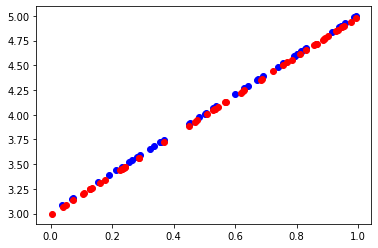

In [96]:
# Use small value (0.01) for mu
small_mu_data, small_mu_labels = get_random_data(2.0, 3.0, 0.01, 0.0, 100)
display_random_data(small_mu_data, small_mu_labels)

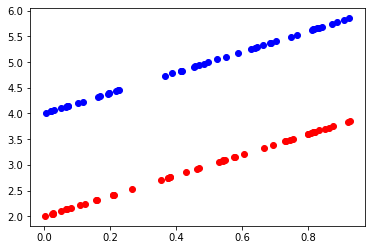

In [97]:
# Use larger value (1.0) for mu, leaving all other parameters constant
large_mu_data, large_mu_labels = get_random_data(2.0, 3.0, 1.0, 0.0, 100)
display_random_data(large_mu_data, large_mu_labels)

As can be seen in the plots above, increasing the value of `mu` results in more separation between the points labeled 0 and the points labeled 1.

Next, the `sigma` parameter, the standard deviation of the normal distribution that is used to generate the noise for feature $x_2$ will be varied.

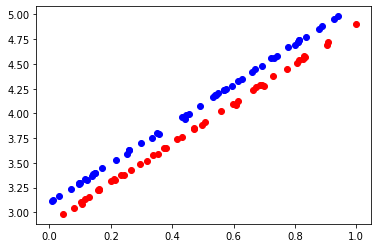

In [98]:
# Use small value (0.01) for sigma
small_sigma_data, small_sigma_labels = get_random_data(2.0, 3.0, 0.1, 0.01, 100)
display_random_data(small_sigma_data, small_sigma_labels)

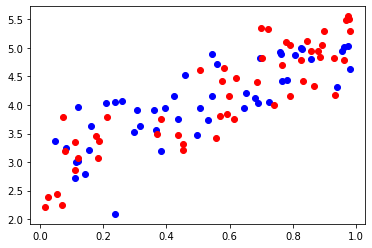

In [99]:
# Use larger value (0.5) for sigma, leaving all other parameters constant
large_sigma_data, large_sigma_labels = get_random_data(2.0, 3.0, 0.1, 0.5, 100)
display_random_data(large_sigma_data, large_sigma_labels)

As can be seen in the plots above, increasing the value of `sigma` results in more points being on the wrong side of the line. For example, in the charts above, points labeled 0 should be above the line $y = 2x + 3$, and points labeled 1 should be below the line. When `sigma` is large, there are many points where this is not true.

For the data I will use in problems 2 and 3, I chose moderate values for `sigma` and `mu`. I chose `mu` to be $0.25$ and `sigma` to be $0.2$.

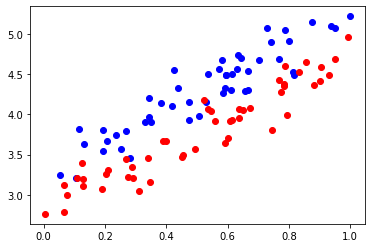

In [100]:
actual_w = 2.0
actual_b = 3.0
small_m_data, small_m_labels = get_random_data(actual_w, actual_b, 0.25, 0.2,
                                               100)
display_random_data(small_m_data, small_m_labels)

However, for my models to learn the pattern of the data, they may need more data points. I will use 10,000 data points to ensure that the models have enough data to learn from.

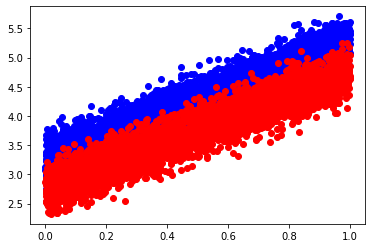

In [105]:
data, labels = get_random_data(actual_w, actual_b, 0.25, 0.2, 10000)
display_random_data(data, labels)

## Split data into training set and test set

Next, the data and labels are split into a training set (80%) and a test set (20%).

In [0]:
# Get number of elements in the training set (80% of data set)
train_size = int(0.8 * labels.shape[0])

# Split data and labels into training set and test set
train_data = data[:train_size]
train_labels = labels[:train_size]
test_data = data[train_size:]
test_labels = labels[train_size:]

# Problem 2

## Implement logistic regression using Keras


Since logistic regression is being performed, sigmoid is used as the activation function for the final (and only) layer, and binary crossentropy is used as the loss function. RMSprop is used as the optimizer.

The model is trained on the training set for 20 epochs using a batch size of 512, then the model is evaluated on the test set.

In [107]:
# Create model
model = models.Sequential()
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(train_data, train_labels, epochs=20, batch_size=512)

# Evaluate model
results = model.evaluate(test_data, test_labels)

Train on 8000 samples
Epoch 1/20
8000/8000 [==============================] - 0s 38us/sample - loss: 0.7353 - accuracy: 0.4950
Epoch 2/20
8000/8000 [==============================] - 0s 3us/sample - loss: 0.7207 - accuracy: 0.5036
Epoch 3/20
8000/8000 [==============================] - 0s 3us/sample - loss: 0.7104 - accuracy: 0.5090
Epoch 4/20
8000/8000 [==============================] - 0s 3us/sample - loss: 0.7020 - accuracy: 0.5123
Epoch 5/20
8000/8000 [==============================] - 0s 3us/sample - loss: 0.6952 - accuracy: 0.5251
Epoch 6/20
8000/8000 [==============================] - 0s 3us/sample - loss: 0.6902 - accuracy: 0.5321
Epoch 7/20
8000/8000 [==============================] - 0s 3us/sample - loss: 0.6864 - accuracy: 0.5375
Epoch 8/20
8000/8000 [==============================] - 0s 3us/sample - loss: 0.6840 - accuracy: 0.5487
Epoch 9/20
8000/8000 [==============================] - 0s 3us/sample - loss: 0.6824 - accuracy: 0.5520
Epoch 10/20
8000/8000 [==================

In [108]:
print("\nResults on Test Set")
print("===================")
print("Loss:", results[0])
print("Accuracy:", results[1])


Results on Test Set
Loss: 0.6812658534049988
Accuracy: 0.5615


## Display results

### Heatmap visualization

The heatmap below visualizes the function $f: \mathbb{R}^2 \rightarrow \mathbb{R}$ that the trained model realizes.


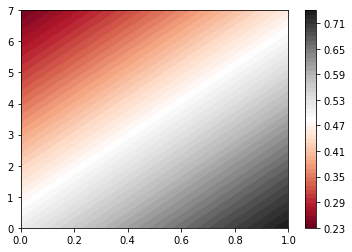

In [109]:
x = np.linspace(0, 1, 50)
y = np.linspace(0, 7, 50)
X, Y = np.meshgrid(x, y)
X = X.flatten()
Y = Y.flatten()
Z = model.predict(np.column_stack((X, Y)))
Z = Z.flatten()
plt.tricontourf(X, Y, Z, 50, cmap='RdGy')
plt.colorbar();

### Separating line of trained model

The separating line for the data is when the output of the model is $1 \over 2$. This is because $0.5$ is used as the threshold for classifying whether a point is label 0 or label 1. For example, if the output of the model is above $0.5$ for a given example, the model will predict that the example belongs to class 0; if the output of the model is below $0.5$, the model will predict that the example belongs to class 1.

The output of the model is computed from the given input features $x_1$ and $x_2$ as follows: $a =$ $1 \over 1 + e^{-z}$, where $z = w_1 x_1 + w_2 x_2 + b$. Thus, we are interested in the line of points where $1 \over 1 + e^{-(w_1 x_1 + w_2 x_2 + b)}$ $=$ $1 \over 2$. A property of the sigmoid activation function $\sigma$ is that $\sigma(0) =$ $1 \over 2$. That means we are interested in the line of points where $z = w_1 x_1 + w_2 x_2 + b = 0$.

Since $x_2$ is dependent on $x_1$, we will find a formula $x_2 = w_{line} x_1 + b_{line}$ to get the separating line of the trained model. $w_1 x_1 + w_2 x_2 + b = 0$ can be rewritten as $x_2 =$ $-w_1 x_1 - b \over w_2$ $=$ $-w_1 \over w_2$ $x$ + $-b \over w_2$. This shows that $w_{line} =$ $-w_1 \over w_2$ and $b_{line} =$ $-b \over w_2$.

The code below outputs the values for $w_{line}$ and $b_{line}$, along with the actual weight and bias from the trained model.

In [110]:
weights = model.get_weights()
w_1 = weights[0][0][0]
w_2 = weights[0][1][0]
b = weights[1][0]
w_line = -w_1 / w_2
b_line = -b / w_2

print("Separating Line")
print("===============")
print("Predicted Weight: {0:.2f}, Actual Weight: {1:.2f}".format(w_line,
                                                                 actual_w))
print("Predicted Bias: {0:.2f}, Actual Bias: {1:.2f}".format(b_line, actual_b))

Separating Line
Predicted Weight: 5.71, Actual Weight: 2.00
Predicted Bias: 0.30, Actual Bias: 3.00


The data generated in Problem 1, the actual separating line of the data, and the separating line predicted by the trained model are shown below.

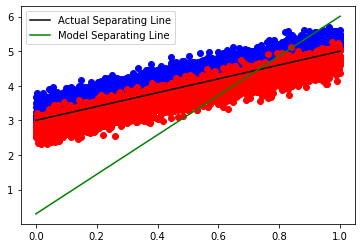

In [111]:
display_random_data(data, labels)
x_1 = np.linspace(0.0, 1.0)
x_2_actual = x_1 * actual_w + actual_b
x_2_pred = x_1 * w_line + b_line
plt.plot(x_1, x_2_actual, color='black', label='Actual Separating Line');
plt.plot(x_1, x_2_pred, color='green', label='Model Separating Line');
plt.legend();

# Problem 3

## Implement logistic regression using NumPy

### Train model

The code below implements logistic regression using numpy. Much of the code is based on [Dr. Wocjan's NumPy implementation of linear regression](https://github.com/schneider128k/machine_learning_course/blob/master/linear_regression_gradient_descent.ipynb).

The main differences between this code and Dr. Wocjan's linear regression implementation are that this code uses the sigmoid function as the activation function and binary crossentropy as the loss function. The sigmoid activation function is implemented simply as $\sigma (z) =$ $1 \over 1 + e^{-z}$. The use of binary crossentropy loss changes how the gradient of the loss is calculated. From [Dr. Wocjan's logistic regression notes](https://github.com/schneider128k/machine_learning_course/blob/master/slides/logistic_regression.pdf), the partial derivative of the loss with respect to a weight $w_j$ is $(a-y) x_j$, and the partial derivative of the loss with respect to bias $b$ is $a-y$.

In [0]:
# Train for 20 epochs
epochs = 20
# Use learning rate of 0.01
lr = 0.01
weight = np.random.randn(3,)
m = train_labels.shape[0]
X_b = np.column_stack([np.ones((m, 1)), train_data])
y = train_labels

for epoch in range(epochs):
  # Shuffle data points
  shuffled_indices = np.random.permutation(m)
  X_b_shuffled = X_b[shuffled_indices]
  y_shuffled = y[shuffled_indices]
  
  for i in range(m):
    xi = X_b_shuffled[i]
    yi = y_shuffled[i]
    # Compute output of neuron before going through activation function
    z = xi.dot(weight)
    # Apply sigmoid activation function
    a = 1.0 / (1.0 + np.exp(-z))
    # Update weights and bias
    gradient = (a - yi) * xi
    weight -= lr * gradient

### Evaluate Model

The code below outputs the binary crossentropy loss and the accuracy of the trained model on the test set. The formula used for computing the binary crossentropy loss, $\mathcal{L} = -y \log(a) - (1-y) \log(1-a)$, is from [Dr. Wocjan's logistic regression notes](https://github.com/schneider128k/machine_learning_course/blob/master/slides/logistic_regression.pdf).

In [113]:
accuracy = 0.0
loss = 0.0
m = test_labels.shape[0]
X_b = np.column_stack([np.ones((m, 1)), test_data])
y = test_labels

for i in range(m):
  # Get output of model
  xi = X_b[i]
  yi = y[i]
  z = xi.dot(weight)
  a = 1.0 / (1.0 + np.exp(-z))

  # Compute binary crossentropy loss for this data point
  loss += -yi*np.log(a) - (1-yi)*np.log(1-a)

  # Determine prediction (label 0 or label 1) based on model output
  prediction = 1.0 if a >= 0.5 else 0.0
  if prediction == yi:
    accuracy += 1

accuracy /= m
loss /= m

print("\nResults on Test Set")
print("===================")
print("Loss:", loss)
print("Accuracy:", accuracy)


Results on Test Set
Loss: 0.30733908026863666
Accuracy: 0.8965


## Display results

### Heatmap visualization

The heatmap below visualizes the function $f: \mathbb{R}^2 \rightarrow \mathbb{R}$ that the trained model realizes.


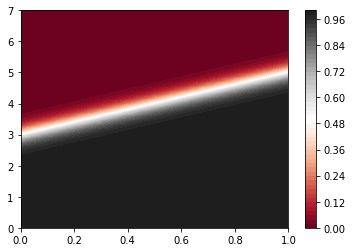

In [114]:
x = np.linspace(0, 1, 50)
y = np.linspace(0, 7, 50)
X, Y = np.meshgrid(x, y)
X = X.flatten()
Y = Y.flatten()

# Get predictions of model as Z
m = X.shape[0]
X_b = np.column_stack([np.ones((m, 1)), X, Y])
Z = []
for i in range(m):
  z = X_b[i].dot(weight)
  a = 1.0 / (1.0 + np.exp(-z))
  Z.append(a)

plt.tricontourf(X, Y, Z, 50, cmap='RdGy')
plt.colorbar();

### Separating line of trained model

The separating line for the data is when the output of the model is $1 \over 2$. This is because $0.5$ is used as the threshold for classifying whether a point is label 0 or label 1. For example, if the output of the model is above $0.5$ for a given example, the model will predict that the example belongs to class 0; if the output of the model is below $0.5$, the model will predict that the example belongs to class 1.

The output of the model is computed from the given input features $x_1$ and $x_2$ as follows: $a =$ $1 \over 1 + e^{-z}$, where $z = w_1 x_1 + w_2 x_2 + b$. Thus, we are interested in the line of points where $1 \over 1 + e^{-(w_1 x_1 + w_2 x_2 + b)}$ $=$ $1 \over 2$. A property of the sigmoid activation function $\sigma$ is that $\sigma(0) =$ $1 \over 2$. That means we are interested in the line of points where $z = w_1 x_1 + w_2 x_2 + b = 0$.

Since $x_2$ is dependent on $x_1$, we will find a formula $x_2 = w_{line} x_1 + b_{line}$ to get the separating line of the trained model. $w_1 x_1 + w_2 x_2 + b = 0$ can be rewritten as $x_2 =$ $-w_1 x_1 - b \over w_2$ $=$ $-w_1 \over w_2$ $x$ + $-b \over w_2$. This shows that $w_{line} =$ $-w_1 \over w_2$ and $b_{line} =$ $-b \over w_2$.

The code below outputs the values for $w_{line}$ and $b_{line}$, along with the actual weight and bias from the trained model.

In [115]:
w_1 = weight[1]
w_2 = weight[2]
b = weight[0]
w_line = -w_1 / w_2
b_line = -b / w_2

print("Separating Line")
print("===============")
print("Predicted Weight: {0:.2f}, Actual Weight: {1:.2f}".format(w_line,
                                                                 actual_w))
print("Predicted Bias: {0:.2f}, Actual Bias: {1:.2f}".format(b_line, actual_b))

Separating Line
Predicted Weight: 2.01, Actual Weight: 2.00
Predicted Bias: 2.99, Actual Bias: 3.00


The data generated in Problem 1, the actual separating line of the data, and the separating line predicted by the trained model are shown below.

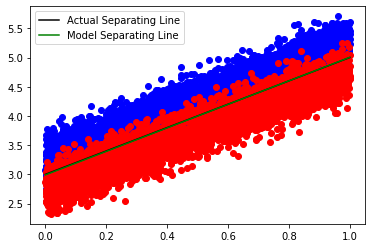

In [116]:
display_random_data(data, labels)
x_1 = np.linspace(0.0, 1.0)
x_2_actual = x_1 * actual_w + actual_b
x_2_pred = x_1 * w_line + b_line
plt.plot(x_1, x_2_actual, color='black', label='Actual Separating Line');
plt.plot(x_1, x_2_pred, color='green', label='Model Separating Line');
plt.legend();